https://www.kaggle.com/c/competitive-data-science-final-project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

path = '/Users/rizki/Dropbox/Coursera/AML_HowToKaggle/FinalProject/PredictSales/all/'

items = pd.read_csv(path+'items.csv')
item_categories = pd.read_csv(path+'item_categories.csv')
shops = pd.read_csv(path+'shops.csv')
sales_train = pd.read_csv(path+'sales_train.csv')
test = pd.read_csv(path+'test.csv')

# Format 'date' to datetime
sales_train['date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')

# Add item_category_id to sales_train
sales_train = pd.merge(sales_train,items[['item_id','item_category_id']],on='item_id',how='left').sort_values(by='item_id')

#add new columns: years, month, Y_M
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month
sales_train_year = sales_train['date'].dt.year.astype('string')
sales_train_month = sales_train['date'].dt.month.astype('string')
sales_train['Y_M'] = sales_train_year+'_'+sales_train_month

#split by year
sales_train_2013 = sales_train[sales_train['year']==2013]
sales_val_2014 = sales_train[sales_train['year']==2014]
sales_test_2015 = sales_train[sales_train['year']==2015]

#columns to keep
#col_to_keep = ['shop_id','item_id','item_price','item_category_id','item_cnt_day']
col_to_keep = ['shop_id','item_id','item_category_id','item_cnt_day']

groupby_list = ['shop_id','item_id']

#agg_dict = {'item_price':'mean','item_category_id':'mean','item_cnt_day':'sum'}
agg_dict = {'item_category_id':'mean','item_cnt_day':'sum'}
agg_targ = {'item_cnt_day':'sum'}

# Adding prediction from Oct8-2018_2 to 2015 set and compare

In [2]:
path_Oct8_2018_2 ='/Users/rizki/Dropbox/Coursera/AML_HowToKaggle/FinalProject/PredictSales/results/submissions/Oct8-2018_2/'
Oct8_2018_2 = pd.read_csv(path_Oct8_2018_2+'submit_Oct8-2018_2.csv')
Oct8_2018_2.head()

,ID,item_cnt_month
0,0,0.878411
1,1,-0.934888
2,2,1.032142
3,3,1.092099
4,4,0.799432


total sales count from Oct8-2018 prediction: 228154.25210453675
total sales count from contant 0.5 prediction: 107100.0


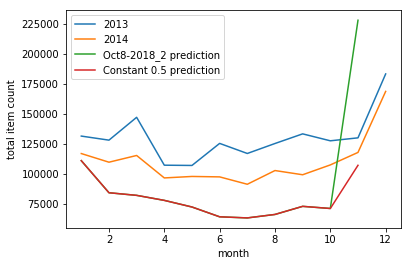

In [3]:
y_test_total_cnt_month = Oct8_2018_2.sum()['item_cnt_month']
print 'total sales count from Oct8-2018 prediction:',y_test_total_cnt_month

constant_total_cnt_month = 214200 * 0.5
print 'total sales count from contant 0.5 prediction:',constant_total_cnt_month

total_item_cnt_2013 = sales_train_2013.groupby(['date_block_num','Y_M'])['item_cnt_day'].sum().values
total_item_cnt_2014 = sales_val_2014.groupby(['date_block_num','Y_M'])['item_cnt_day'].sum().values
total_item_cnt_2015 = sales_test_2015.groupby(['date_block_num','Y_M'])['item_cnt_day'].sum().values

#Adding Oct8-2018_2 pred
total_item_cnt_2015_1 = np.append(total_item_cnt_2015,[y_test_total_cnt_month])
#Adding constant pred of 0.5 - benchmark
total_item_cnt_2015_2 = np.append(total_item_cnt_2015,[constant_total_cnt_month])

#plot
x13 = [i+1 for i in xrange(len(total_item_cnt_2013)) ]
y13 = total_item_cnt_2013
x14 = [i+1 for i in xrange(len(total_item_cnt_2014)) ]
y14 = total_item_cnt_2014
x15_1 = [i+1 for i in xrange(len(total_item_cnt_2015_1)) ]
y15_1 = total_item_cnt_2015_1
x15_2 = [i+1 for i in xrange(len(total_item_cnt_2015_2)) ]
y15_2 = total_item_cnt_2015_2
plt.plot(x13,y13,label='2013')
plt.plot(x14,y14,label='2014')
plt.plot(x15_1,y15_1,label='Oct8-2018_2 prediction')
plt.plot(x15_2,y15_2,label='Constant 0.5 prediction')
plt.ylabel('total item count')
plt.xlabel('month')
plt.legend()
plt.savefig('yearly_trend_compare_with_pred_Oct8-2018_2.pdf')
plt.show()

#### This plot explains the terrible rmse score on the test set :D